### Import libraries

In [165]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import pandas as pd
import numpy as np

import chart_studio
import chart_studio.plotly as py 
import plotly.express as px

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

# 1. Load Dataset

In [186]:
df = pd.read_csv("world_university_rank.csv")
df.head(10)

,Rank,University name,locationLocation,Number of Studnet,Number of student per staffs,International Student,Female : male ratio
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60
5,6,California Institute of Technology,United States,"2,237",6.2,34%,37 : 63
6,7,Princeton University,United States,"8,279",8.0,23%,46 : 54
7,8,"University of California, Berkeley",United States,"40,921",18.4,24%,52 : 48
8,9,Yale University,United States,"13,482",5.9,21%,52 : 48
9,10,Imperial College London,United Kingdom,"18,545",11.2,61%,40 : 60


# 2. Data Cleaning

In [176]:
# Basics (check mmisisng values, data types, df shape etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rank                          2345 non-null   object 
 1   University name               2345 non-null   object 
 2   locationLocation              2234 non-null   object 
 3   Number of Studnet             2345 non-null   object 
 4   Number of student per staffs  2344 non-null   float64
 5   International Student         2345 non-null   object 
 6   Female : male ratio           2255 non-null   object 
dtypes: float64(1), object(6)
memory usage: 128.4+ KB


111 missing value for `location`, 1 missing value for `number of student per staffs` and around 200+ missing values for `female : male ratio`. Let's find out what they are, but before that let's fix the column names to something readable by python syntax.

In [187]:
df.rename(columns = {'University name': 'university_name', 'locationLocation' : 'location', 'Number of Studnet': 'number_of_students',
                      'Number of student per staffs': 'number_of_students_per_staff', 'International Student': 'international_student',
                      'Female : male ratio': 'female_male_ratio'}, inplace=True)

We drop the rows with missing values in the dataframe. On top of that we need to change the data type for some of the columns. 

Since the rank are inconsistent at the end of the dataset, I think it's sensible to just look at the top 200 universities in the world.

In [188]:
df = df[:200]
df.loc[df.index[-1], 'Rank'] = 200

In [198]:
# Change rank data type
df['Rank'] = df['Rank'].astype(int)

# Remove commas from number of students then change data type
df['number_of_students'] = df['number_of_students'].astype(str).str.replace(',', '').astype(int)

# remove percentage from internation students and change data type
df['international_student'] = df['international_student'].str.rstrip('%').astype(float) / 100

In [199]:
df_top200 = df.copy()
df_top200

,Rank,university_name,location,number_of_students,number_of_students_per_staff,international_student,female_male_ratio
0,1,University of Oxford,United Kingdom,20965,10.6,0.42,48 : 52
1,2,Harvard University,United States,21887,9.6,0.25,50 : 50
2,3,University of Cambridge,United Kingdom,20185,11.3,0.39,47 : 53
3,3,Stanford University,United States,16164,7.1,0.24,46 : 54
4,5,Massachusetts Institute of Technology,United States,11415,8.2,0.33,40 : 60
...,...,...,...,...,...,...,...
195,196,University of Erlangen-Nuremberg,Germany,30303,43.4,0.13,51 : 49
196,196,Sichuan University,China,49543,15.8,0.06,NaN
197,198,Durham University,United Kingdom,18425,14.1,0.35,54 : 46
198,198,Queen’s University Belfast,United Kingdom,19060,15.8,0.39,57 : 43


Looks not bad! I guess we will just work with these 200 universities! 

# 3. Exploratory Data Analysis

Look further into the data:
1. Create a chloropleth map to look at the concentration of top 200 universities in different countries
2. Plot the top 10 university change from 2013-2023 ?
3. Investigate the relationship between university rankings vs number of students

## Chloropleth map 

In [107]:
# Groupby universities into location and count
df_map = df_top200.groupby('location').count().reset_index()
df_map = df_map[['location', 'Rank']].sort_values(by = 'Rank', ascending=False).reset_index(drop=True)
df_map.rename(columns = {'Rank': 'num_universities'}, inplace=True)
df_map

,location,num_universities
0,United States,58
1,United Kingdom,28
2,Germany,22
3,China,11
4,Australia,10
5,Netherlands,10
6,Canada,7
7,South Korea,6
8,Switzerland,6
9,France,5


In [280]:
# Plot the choropleth map   
fig = px.choropleth(data_frame = df_map,
                     locations = 'location',
                     locationmode = 'country names', 
                     color = 'num_universities',
                     hover_name = 'location',
                     hover_data = ['location', 'num_universities'],
                     title = 'Distribution of Top 200 Universities by Country',
                     color_continuous_scale = px.colors.sequential.Plasma,
                     labels = {'num_universities': 'Number of Top 200 Universities'}, 
                     projection = 'mercator')

fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")
fig.update_layout(geo=dict(showframe=False, showcoastlines=True, projection_type='mercator'),
                  title=dict(x=0.5, xanchor='center', font=dict(size=24)),
                  coloraxis_colorbar=dict(title='Number of Universities'))
fig.show()

In [93]:
df_map10 = df_map[:10]
df_map10['location'][0] = 'United\nStates'
df_map10['location'][1] = 'United\nKingdom'
df_map10

/var/folders/z1/7rqsn2ms1qdgg5wz1d2g6wv00000gn/T/ipykernel_61904/4002965245.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/z1/7rqsn2ms1qdgg5wz1d2g6wv00000gn/T/ipykernel_61904/4002965245.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,location,num_universities
0,United\nStates,58
1,United\nKingdom,28
2,Germany,22
3,China,11
4,Australia,10
5,Netherlands,10
6,Canada,7
7,South Korea,6
8,Switzerland,6
9,France,5


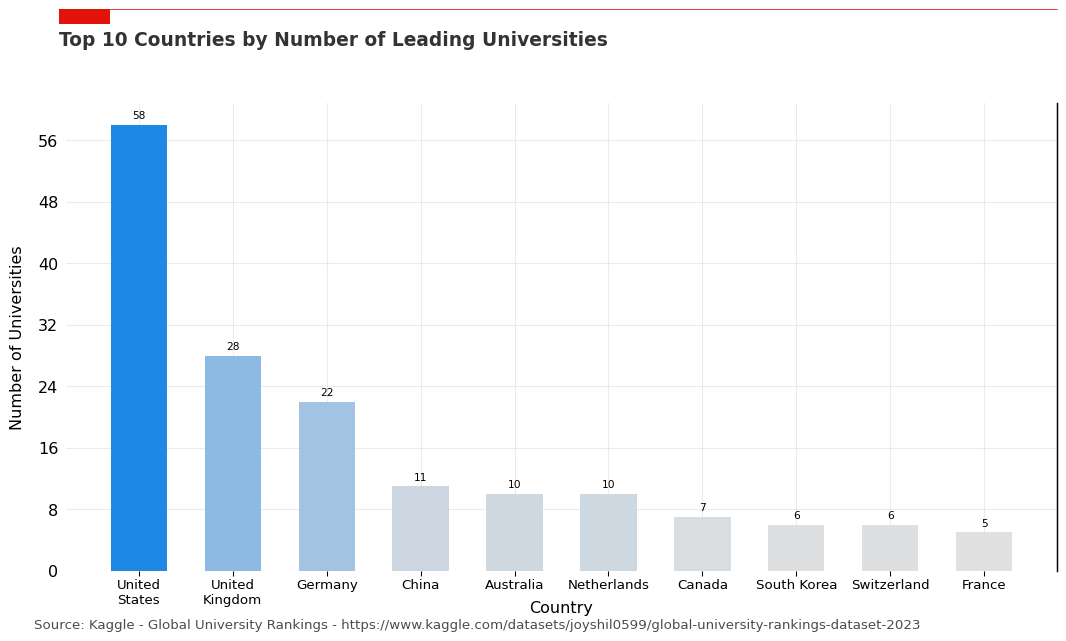

In [283]:
# Create the figure and objects, specify size and dots per inches
fig, ax = plt.subplots(figsize=(13.33, 7.5), dpi=96)

# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat x-axis label and tick labels
ax.set_xlabel('Country', fontsize=12, labelpad=-4) 
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=10, labelrotation=0)

# Set custom labels for x-axis ticks
labels = [e.title() for e in df_map10['location']]
ax.set_xticks(range(len(labels)))  # Set tick positions
ax.set_xticklabels(labels)  # Set tick labels

# Reformat y-axis
ax.set_ylabel('Number of Universities', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Colours - Choose the extreme colours of the colour map
colours = ["#e0e0e0", "#1e88e5"]

# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(df_map10['num_universities'].min(), df_map10['num_universities'].max()) # linearly normalizes data into the [0.0, 1.0] interval

# Add labels on top of each bar
bar1 = ax.bar(df_map10['location'], df_map10['num_universities'], color=cmap(norm(df_map10['num_universities'])), width=0.6, zorder=2)
ax.bar_label(bar1, labels=[f'{e}' for e in df_map10['num_universities']], padding=3, color='black', fontsize=8)

# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.93, s="Top 10 Countries by Number of Leading Universities", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
#ax.text(x=0.12, y=.90, s="", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Set source text
ax.text(x=0.1, y=0.12, s="Source: Kaggle - Global University Rankings - https://www.kaggle.com/datasets/joyshil0599/global-university-rankings-dataset-2023", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

# Adjust the margins aronund the plot 
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

# Top 10 University Ranking Change (2010 - 2023)

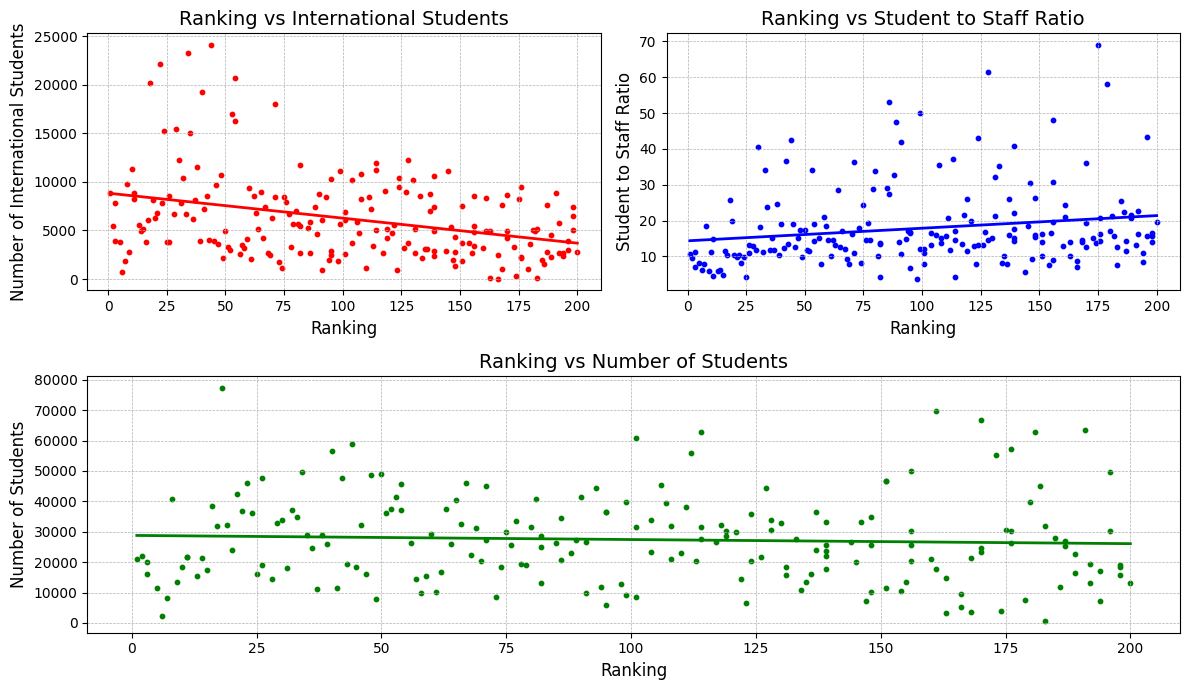

In [172]:
plt.figure(figsize=(12, 7))

# Fit polynomial line
x = df_top200['Rank'].to_numpy()
y1 = df_top200['num_international'].to_numpy()
y2 = df_top200['number_of_students_per_staff'].to_numpy()
y3 = df_top200['number_of_students'].to_numpy()

b, a = np.polyfit(x, y1, 1)
b1, a1 = np.polyfit(x, y2, 1)
b2, a2 = np.polyfit(x, y3, 1)

# Create sequence of 100 numbers from 0 to 100
xseq = np.linspace(min(x), max(x), num=100)

# Ranking vs International students num
plt.subplot(2, 2, 1) # divide as 2x1, plot top left
plt.scatter(df_top200['Rank'], df_top200['num_international'], s=10, color='red')
plt.plot(xseq, a + b * xseq, c='r', linewidth=2)
plt.xlabel("Ranking", size=12)
plt.ylabel("Number of International Students", size=12)
plt.title("Ranking vs International Students", size = 14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ranking vs Student per Staff Ratio
plt.subplot(2, 2, 2) # divide as 2x2, plot top right
plt.scatter(df_top200['Rank'], df_top200['number_of_students_per_staff'], s=10, color='blue')
plt.plot(xseq, a1 + b1 * xseq, c='b', linewidth=2)
plt.xlabel("Ranking", size=12)
plt.ylabel("Student to Staff Ratio", size=12)
plt.title("Ranking vs Student to Staff Ratio", size = 14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.subplot(2, 1, 2) # divide as 2x2, plot top bottom
plt.scatter(df_top200['Rank'], df_top200['number_of_students'], s=10, color='green')
plt.plot(xseq, a2 + b2 * xseq, c='g', linewidth=2)
plt.xlabel("Ranking", size=12)
plt.ylabel("Number of Students", size=12)
plt.title("Ranking vs Number of Students", size=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [288]:
df_top200['num_international'] = (df['number_of_students'] * df['international_student']).astype(int)

,Rank,university_name,location,number_of_students,number_of_students_per_staff,international_student,female_male_ratio,num_international
43,44,Monash University,Australia,58725,42.5,0.41,57 : 43,24077


In [299]:
df_top200[df_top200['location'] == "United Kingdom"]

,Rank,university_name,location,number_of_students,number_of_students_per_staff,international_student,female_male_ratio,num_international
0,1,University of Oxford,United Kingdom,20965,10.6,0.42,48 : 52,8805
2,3,University of Cambridge,United Kingdom,20185,11.3,0.39,47 : 53,7872
9,10,Imperial College London,United Kingdom,18545,11.2,0.61,40 : 60,11312
21,22,UCL,United Kingdom,36790,10.3,0.60,59 : 41,22074
28,29,University of Edinburgh,United Kingdom,32845,11.8,0.47,62 : 38,15437
34,35,King’s College London,United Kingdom,28965,11.8,0.52,63 : 37,15061
36,37,London School of Economics and Political Science,United Kingdom,11120,11.9,0.73,55 : 45,8117
53,54,University of Manchester,United Kingdom,37035,14.2,0.44,55 : 45,16295
75,76,University of Bristol,United Kingdom,25680,14.6,0.31,56 : 44,7960
82,82,University of Glasgow,United Kingdom,28540,13.5,0.41,59 : 41,11701


Insights:
1. As ranking increases, the number of international students decrease.
2. As ranking increases, there is a slight increases in student:staff ratio.
3. A slight decrease in number of students as ranking increases but generally there's no trend.

## Pyramid Chart of top 10 Universities (Male to Female)

In [262]:
df_pyramid = df[:10].copy()
df_pyramid

,Rank,university_name,location,number_of_students,number_of_students_per_staff,international_student,female_male_ratio
0,1,University of Oxford,United Kingdom,20965,10.6,0.42,48 : 52
1,2,Harvard University,United States,21887,9.6,0.25,50 : 50
2,3,University of Cambridge,United Kingdom,20185,11.3,0.39,47 : 53
3,3,Stanford University,United States,16164,7.1,0.24,46 : 54
4,5,Massachusetts Institute of Technology,United States,11415,8.2,0.33,40 : 60
5,6,California Institute of Technology,United States,2237,6.2,0.34,37 : 63
6,7,Princeton University,United States,8279,8.0,0.23,46 : 54
7,8,"University of California, Berkeley",United States,40921,18.4,0.24,52 : 48
8,9,Yale University,United States,13482,5.9,0.21,52 : 48
9,10,Imperial College London,United Kingdom,18545,11.2,0.61,40 : 60


In [263]:
df_pyramid[['num_female', 'num_male']] = df_pyramid['female_male_ratio'].str.split(' : ', expand=True)
df_pyramid['num_female'] = df_pyramid['num_female'].astype(int)
df_pyramid['num_male'] = df_pyramid['num_male'].astype(int)
df_pyramid

,Rank,university_name,location,number_of_students,number_of_students_per_staff,international_student,female_male_ratio,num_female,num_male
0,1,University of Oxford,United Kingdom,20965,10.6,0.42,48 : 52,48,52
1,2,Harvard University,United States,21887,9.6,0.25,50 : 50,50,50
2,3,University of Cambridge,United Kingdom,20185,11.3,0.39,47 : 53,47,53
3,3,Stanford University,United States,16164,7.1,0.24,46 : 54,46,54
4,5,Massachusetts Institute of Technology,United States,11415,8.2,0.33,40 : 60,40,60
5,6,California Institute of Technology,United States,2237,6.2,0.34,37 : 63,37,63
6,7,Princeton University,United States,8279,8.0,0.23,46 : 54,46,54
7,8,"University of California, Berkeley",United States,40921,18.4,0.24,52 : 48,52,48
8,9,Yale University,United States,13482,5.9,0.21,52 : 48,52,48
9,10,Imperial College London,United Kingdom,18545,11.2,0.61,40 : 60,40,60


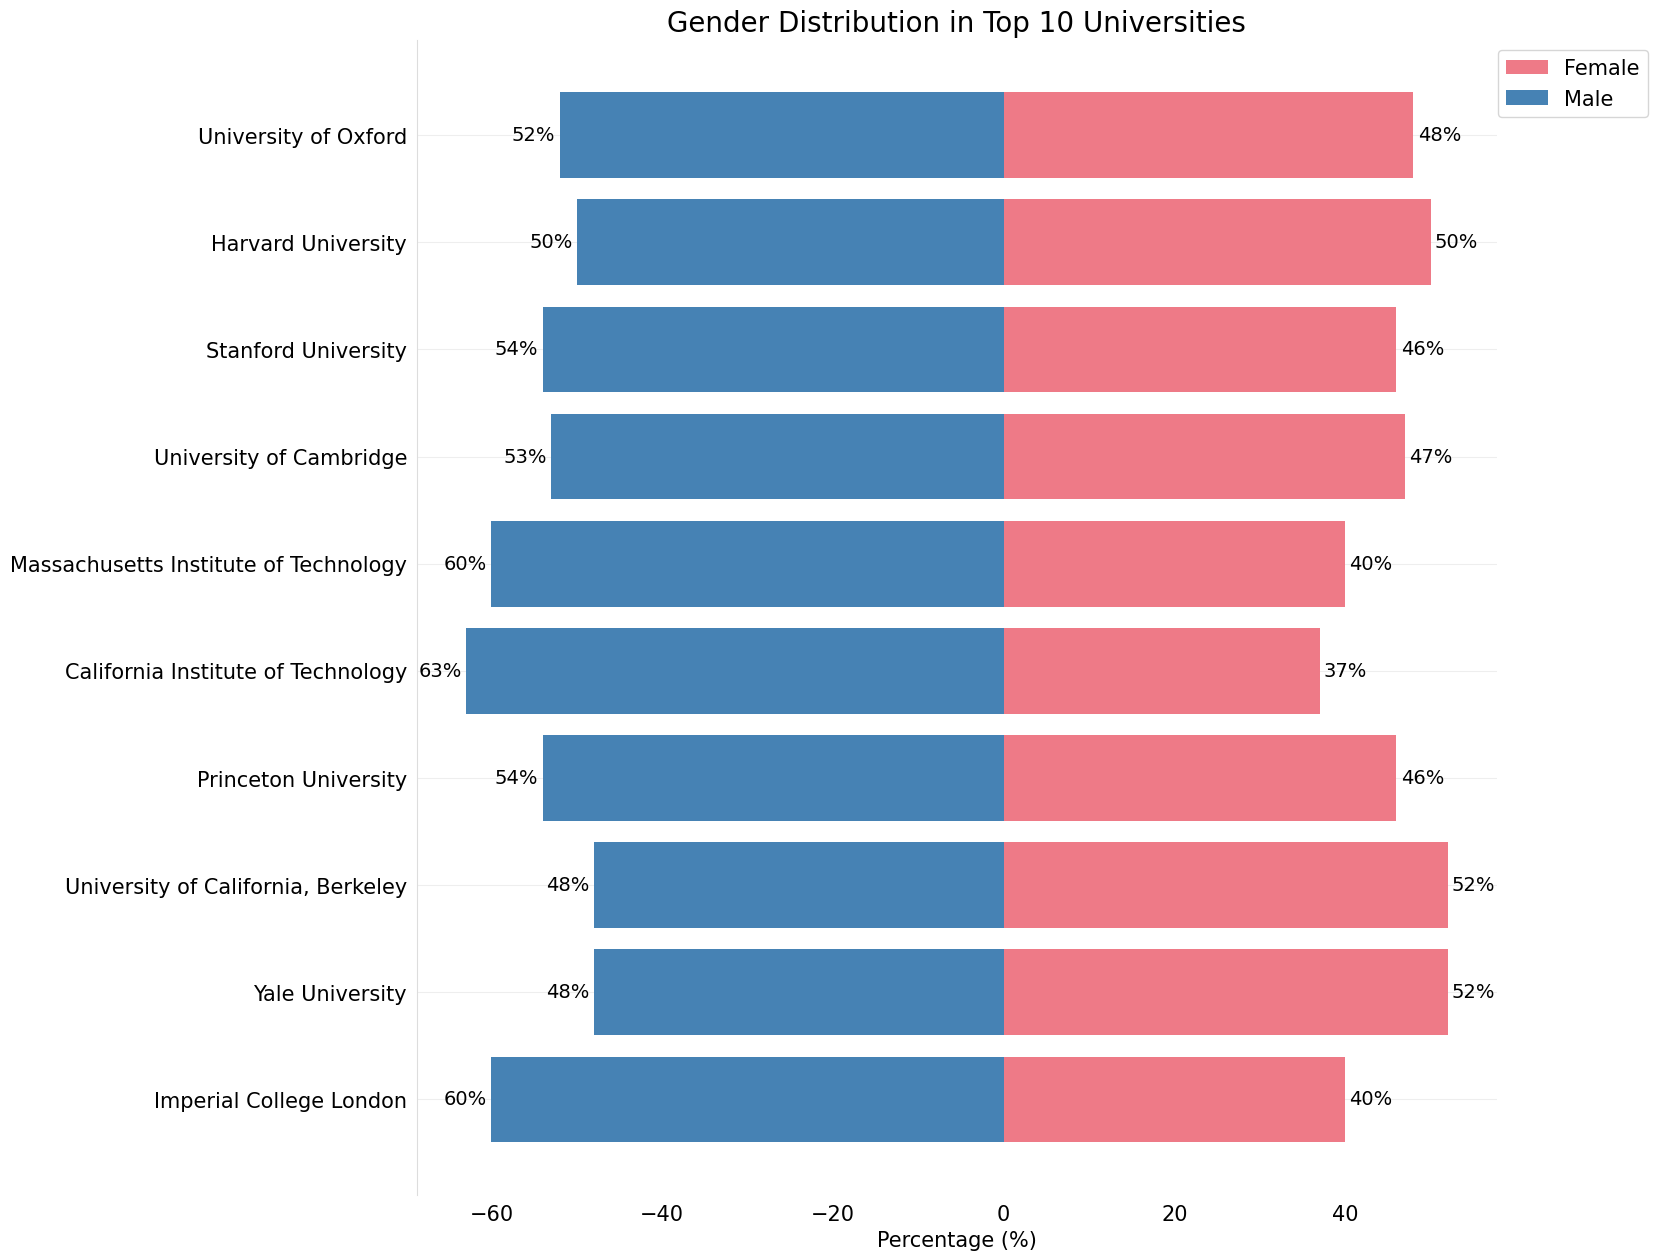

In [277]:
import matplotlib.pyplot as plt

# Colors for male and female
female_color = "#ee7a87"
male_color = "#4682b4"

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(18, 15))

# Plotting the bars
ax.barh(df_pyramid["university_name"], df_pyramid["num_female"], color=female_color, label="Female")
ax.barh(df_pyramid["university_name"], -df_pyramid["num_male"], color=male_color, label="Male")
ax.tick_params(axis='both', which='major', labelsize=15)

# Adding the data labels
for idx, row in df_pyramid.iterrows():
    ax.text(row["num_female"] + 0.5, idx, str(row["num_female"]) + '%', va='center', ha='left', color='black', fontsize=14)
    ax.text(-row["num_male"] - 0.5, idx, str(row["num_male"]) + '%', va='center', ha='right', color='black', fontsize=14)

# Setting the labels and title
ax.set_xlabel("Percentage (%)", fontsize=15)
ax.set_title("Gender Distribution in Top 10 Universities", fontsize=20)
ax.legend(fontsize=15, loc='upper right', bbox_to_anchor=(1.15, 1))

# Aesthetic adjustments
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Display the plot
plt.subplots_adjust(left=0.2, right=0.8)
plt.show()